## Description de la Dataset
Horses or Humans is a dataset of 300×300 images, for learning or testing computer vision algorithms.

In [2]:
# On importe les laibriries nécessaires 
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
train_path = '/content/drive/MyDrive/horse-or-human/train'
val_path = "/content/drive/MyDrive/horse-or-human/validation"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
def get_train_infos():
  for folder in os.listdir(train_path):
    results = {}
    num_of_image = len(os.listdir(os.path.join(train_path, folder)))
    results[folder] = num_of_image
  return results

In [20]:
def get_val_infos():
  for folder in os.listdir(val_path):
    results = {}
    num_of_image = len(os.listdir(os.path.join(val_path, folder)))
    results[folder] = num_of_image
  return results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


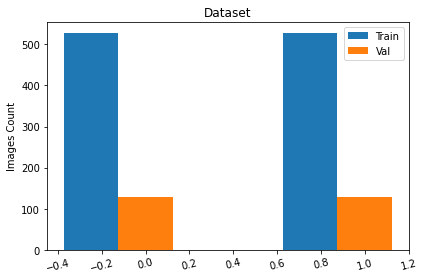

In [25]:
lables = ["Horses", "Humans"]
train_liste = list(get_train_infos().values())
val_list = list(get_val_infos().values())

x = np.arange(len(lables))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_liste, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, lables)
plt.xticks(rotation=15)
ax.legend()
fig.tight_layout()

plt.show()

In [26]:
# Préproccessing des images avant de commencer le traitment.
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')

In [27]:
#Read the data from the dataset
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/horse-or-human/train', # importation des données de la source (Ici j'utilise google drive)
    target_size= (300, 300), # resize on (300pxx300px)
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [28]:
# Preprocessing the test set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Reading the test set
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/horse-or-human/validation',
    target_size= (300, 300),
    batch_size=32,
    class_mode='binary')

Found 256 images belonging to 2 classes.


In [29]:
model = tf.keras.models.Sequential([
      # On a un filtre 3x3 et 16 filtres de demention 3 donc 3*3*3*16+16 = 448
      # Une couche convutionelle de 16 feauters et d'un filtre de taille 9 en 3 demintions RGB
      tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                             input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [32]:
history = model.fit(
    train_generator,
    epochs=15, # on commence l'apprentissage par 15 epoches
    validation_data=validation_generator)

Epoch 1/15
33/33 [==============================] - 553s 16s/step - loss: 0.9323 - accuracy: 0.5287 - val_loss: 0.7230 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 26s 786ms/step - loss: 0.6650 - accuracy: 0.6183 - val_loss: 0.8149 - val_accuracy: 0.5000
Epoch 3/15
33/33 [==============================] - 26s 788ms/step - loss: 0.6013 - accuracy: 0.6981 - val_loss: 1.2361 - val_accuracy: 0.5859
Epoch 4/15
33/33 [==============================] - 26s 786ms/step - loss: 0.5406 - accuracy: 0.7420 - val_loss: 4.2226 - val_accuracy: 0.5352
Epoch 5/15
33/33 [==============================] - 28s 838ms/step - loss: 0.4760 - accuracy: 0.7955 - val_loss: 8.9472 - val_accuracy: 0.5469
Epoch 6/15
33/33 [==============================] - 26s 795ms/step - loss: 0.4244 - accuracy: 0.8306 - val_loss: 0.8818 - val_accuracy: 0.7969
Epoch 7/15
33/33 [==============================] - 27s 805ms/step - loss: 0.3266 - accuracy: 0.8647 - val_loss: 0.5849 - val_accuracy: 0.8320


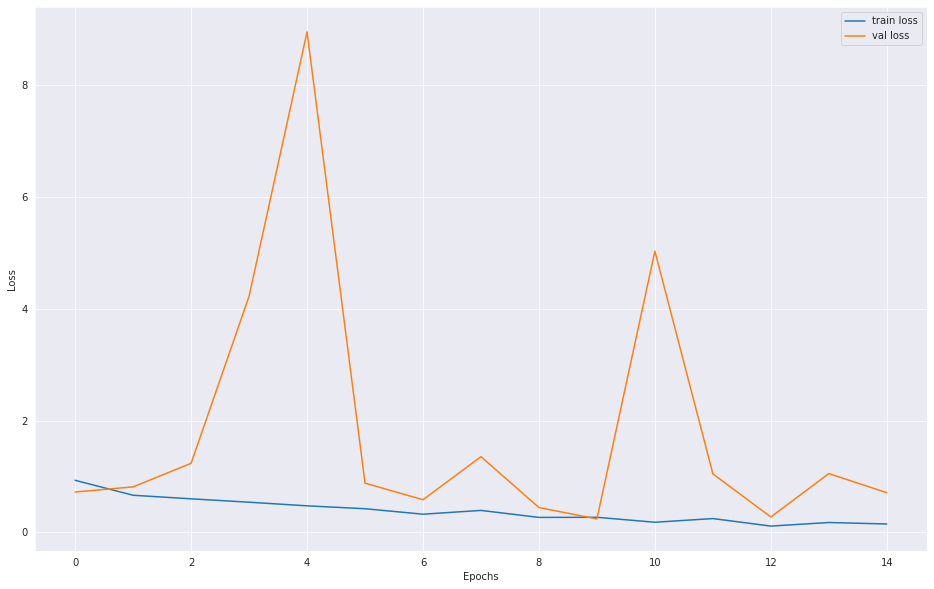

<Figure size 432x288 with 0 Axes>

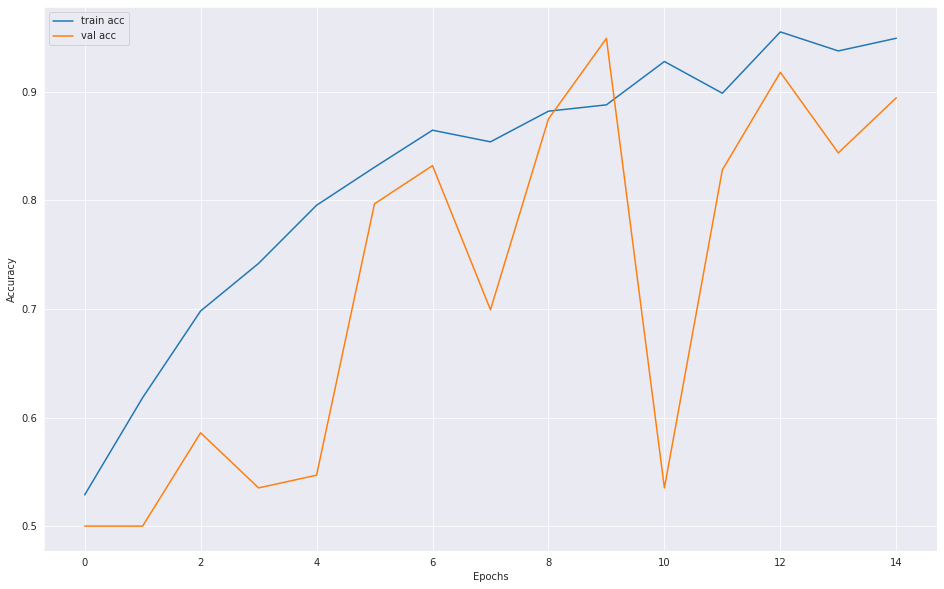

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (16, 10))

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.savefig('Loss_val loss')

# Plotting the Training and Validation Accuracy
plt.figure(figsize = (16, 10))
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('accVal_acc')

Nous pouvons constater que au bout de 8 epoches notre model fait de OverLefting